In [1]:
# Investigate the best number of topics based on coherence
# Use NMPI for calculating the coherence scores

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.tfidfmodel import TfidfModel

df = pd.read_csv('../data/enriched_data.csv')

descriptions = df['PreprocessedDescription'].str.split()
descriptions


0        [welcome, land, fairies, puzzle, game, toddler...
1        [interactive, fantasy, adventure, book, game, ...
2        [plenty, press, touch, explore, children, ages...
3        [winner, xyzzy, interactive, fiction, awards, ...
4        [discover, unpublished, pango, stories, intera...
                               ...                        
12896    [new, season, finally, field, outmanoeuvre, de...
12897    [vacation, usa, explore, beautiful, travel, sp...
12898    [number, casino, slot, machine, real, play, fr...
12899    [xairports, utility, app, allows, owner, popul...
12900    [esta, aplicación, uso, exclusivo, para, salon...
Name: PreprocessedDescription, Length: 12901, dtype: object

In [2]:
dictionary = Dictionary(descriptions)
# TODO keep_n has been changed from 10k to 2k
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=2000)


tfidf = TfidfModel(dictionary=dictionary, id2word=dictionary, normalize=True)
corpus = [dictionary.doc2bow(desc) for desc in descriptions]
corpus_tfidf = list(tfidf[corpus])

# Fibonacci range for initial exploration
# number_of_topics = [1,2,3,5,8,13,21,34,55,89,144]

# Zoomed range
number_of_topics = range(45, 65)



In [3]:
# Coherence for NMF
nmf_coherence_scores = []
#calculate coherence scores for different number of topics
for i in number_of_topics:
    nmf = Nmf(corpus=corpus_tfidf,
              num_topics=i,
              id2word=dictionary,
              random_state=0,
              normalize=True,
              minimum_probability=0.01)
    cm = CoherenceModel(model=nmf,
                        coherence='c_npmi',
                        #coherence='u_mass',
                        texts=descriptions,
                        topn=5,
                        window_size=10
                        )
    nmf_coherence_scores.append(cm.get_coherence())

nmf_coherence_scores


[0.1239186524393962,
 0.14470031213725307,
 0.1343350466984995,
 0.11286238687630505,
 0.10989256362508215,
 0.10672691947805933,
 0.12338756312996967,
 0.13705672287166573,
 0.12374344419281304,
 0.1047004729252866,
 0.12438817182623682,
 0.09472540128352361,
 0.09275719966617581,
 0.10361829785100266,
 0.11856522383728027,
 0.12356663861264322,
 0.10076180808907696,
 0.09024762708928426,
 0.10536131007500746,
 0.09057943919621286]

In [4]:
# Coherence for LDA
lda_coherence_scores = []

for i in number_of_topics:
    lda = LdaModel(
        corpus=corpus,
        num_topics=i,
        id2word=dictionary,
        minimum_probability=0.01,
        random_state=0)

    cm = CoherenceModel(
        model=lda,
        #coherence='u_mass',
        coherence='c_npmi',
        texts=descriptions,
        topn=5,
        window_size=10
    )

    lda_coherence_scores.append(cm.get_coherence())

print(lda_coherence_scores)


[0.09192469333929165, 0.10447535543506081, 0.09703070303171925, 0.11441374267649806, 0.10551248829163883, 0.07345653417624094, 0.09552286313077889, 0.10041497065597185, 0.07674141691916489, 0.05856812153096661, 0.08808296486388763, 0.07313067982744001, 0.07153283458421274, 0.07959943777311267, 0.04938994610514516, 0.07419512898981119, 0.08427008061767013, 0.06921227380703661, 0.09143748229909497, 0.09880672151567921]


In [5]:
# topn 5 , c_uci, window=10
# [-0.6903039386077927, 0.3889820112400598, 0.7304744782195256, 0.4394837585703944, -0.19319898609770939, -0.42197821340188313, -0.23109808340991056, -0.11194779892633186, 0.08449880154288915, -0.6659208106237701, -1.0444989430796923, -0.7039263966522104, -0.4469777902423192, -1.1229733151963106, -0.40266530210534074, -0.7963136208144095, -0.7075449057996915, -1.3890147296377047, -1.6335673383358884]

# c_npmi topn=5, window=10
# [0.022584048572732916, 0.1264734667860175, 0.1620279664782854, 0.15019017688113254, 0.09155491353155, 0.09603046468851113, 0.10347808565266176, 0.12692898503227817, 0.11416715915493635, 0.09034061107894174, 0.06916170120699403, 0.0849879501390066, 0.10290735931393287, 0.07762860348808838, 0.1002492849470694, 0.0804856827943996, 0.08850608293554486, 0.05230309641946672, 0.04624214286580878]

# c_npmi topn=5, window=20
# [0.07557921757222905, 0.1543261389836521, 0.2029636789888472, 0.18441629726184422, 0.1270419076613308, 0.1346793838183959, 0.13257922863414573, 0.15572361620743297, 0.14264252027734223, 0.1199173384376113, 0.09783723604086655, 0.1149817856779376, 0.13345680270028984, 0.10241291949934876, 0.12751091156698985, 0.11599416406197718, 0.1257968856123775, 0.08346265769312271, 0.07768781461645531]

# c_npmi topn=10, window=20
# [0.060436509320837474, 0.10516467373811425, 0.14071146458482975, 0.09307207537216608, 0.08623092723097994, 0.08100370059156586, 0.08543089255552738, 0.09117146920118939, 0.10924339739041436, 0.0712350846651078, 0.07221319129836644, 0.06338861689492686, 0.0694455309668655, 0.06567664778317073, 0.07384620819636527, 0.05988232724954361, 0.05700799591099824, 0.053876134395080655, 0.04842980981533077]

#lda
# [0.012415373475752962, 0.018296223204251307, 0.0271283039722427, 0.0210819158167941, 0.03481930007981993]
# [-0.0038052056404814264, -0.010360226764894596, -0.1492725117377579, -0.11550207419182841, -0.15825559110645251]


In [6]:
#nmf.print_topics()
coherence_per_topic = cm.get_coherence_per_topic()
lda.show_topic(np.argmax(coherence_per_topic))
#print(coherence_per_topic)
#coherence_per_topic
#nmf.show_topics(num_topics=5, num_words=10, formatted=False)
#cm.top_topics_as_word_lists(lda, topn=10, dictionary=dictionary)
cm.get_coherence_per_topic()
lda.show_topic(6)

cm.top_topics_as_word_lists(lda, dictionary=lda.id2word, topn=5)


[['chess', 'piece', 'moves', 'pieces', 'games'],
 ['match', 'free', 'facebook', 'quest', 'friends'],
 ['app', 'privacy', 'use', 'support', 'policy'],
 ['questions', 'trivia', 'quiz', 'test', 'answer'],
 ['coins', 'screen', 'button', 'left', 'cat'],
 ['virtual', 'dog', 'food', 'fun', 'app'],
 ['level', 'player', 'table', 'win', 'players'],
 ['mode', 'time', 'tap', 'seconds', 'simple'],
 ['english', 'german', 'french', 'spanish', 'chinese'],
 ['scene', 'traffic', 'controller', 'registered', 'air'],
 ['points', 'score', 'bubbles', 'dice', 'number'],
 ['bridge', 'season', 'summer', 'trick', 'club'],
 ['extreme', 'best', 'enabled', 'bear', 'motion'],
 ['mode', 'levels', 'line', 'board', 'lines'],
 ['app', 'die', 'planet', 'want', 'money'],
 ['children', 'child', 'app', 'sound', 'fun'],
 ['enemies', 'defense', 'tower', 'fight', 'battle'],
 ['escape', 'island', 'treasure', 'adventure', 'ship'],
 ['space', 'levels', 'arcade', 'power', 'action'],
 ['city', 'build', 'building', 'new', 'world'],


In [16]:
# These are from https://colab.research.google.com/drive/1Qt6qc-kIw3ID3g6emQpGP1QQ2CcOyD5Z#scrollTo=VbbpFa-5dBNs
#nmpi scores for CTM
# This set of scores was from the run of 45 to 65 topics.
ctm_coherence_scores = [0.024104118848987048,
 0.04013209074732583,
 0.004844418252240228,
 0.022234601068534702,
 0.020619784373986032,
 -0.003150076204395262,
 0,
 0.010949950367179663,
 0.012617850540488567,
 0.020314988455817317,
 0.01385249047387685,
 0.021384056946932104,
 0.020077782349342967,
 0.017083649026661197,
 0.032963051621401715,
 0.04066475672627863,
 0,
 0.03338945051967647,
 0.025610764439223815,
 0.008845828621188146]


# this set of scores is from the range of fibo(1, 144) topics
#ctm_coherence_scores = [-0.29208286154628404,
# -0.10188543801614085,
#-0.06478064079373326,
# -0.14039887672806536,
# -0.09408235104864841,
# -0.06571453358111205,
# 0.03321402821464944,
# 0.02829402620923547,
# 0.028201208196595336,
# 0.029914745266432976,
# 0.02401785031055151]

avg_coherence_scores = [sum(x) / 3 for x in zip(lda_coherence_scores, nmf_coherence_scores, ctm_coherence_scores)]


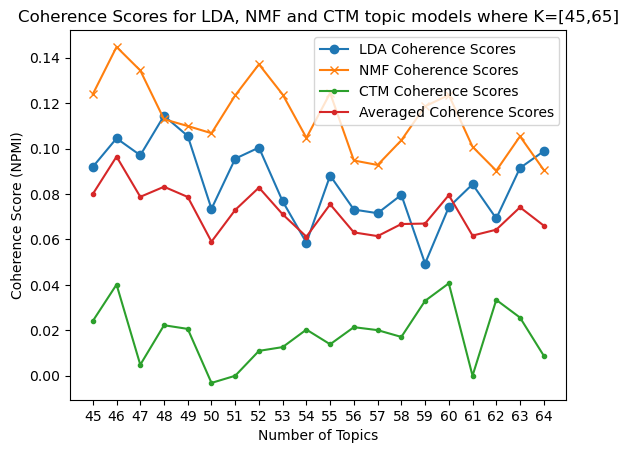

In [19]:
# plot both lda_coherence_scores and nmf_coherence_scores
plt.plot(
    number_of_topics,
    lda_coherence_scores,
    marker='o',
    label='LDA Coherence Scores'
)

plt.plot(
    number_of_topics,
    nmf_coherence_scores,
    marker='x',
    label='NMF Coherence Scores'
)


plt.plot(
    number_of_topics,
    ctm_coherence_scores,
    marker='.',
    label='CTM Coherence Scores'
)

plt.plot(
    number_of_topics,
    avg_coherence_scores,
    marker='.',
    label='Averaged Coherence Scores'
)


plt.xticks(number_of_topics)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score (NPMI)')
plt.title('Coherence Scores for LDA, NMF and CTM topic models where K=[45,65]')
plt.legend()
plt.show()
